In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('../data/telco_churn.csv')

# Preview first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
# Check number of rows and columns
print(f'Dataset shape: {df.shape}')

# Show column types, non-null counts
df.info()

# Summary statistics for numerical columns
df.describe()

# check for missing values
df.isnull().sum()

Dataset shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# Drop unique ID since it's not helpful for prediction
df.drop(columns=['customerID'], inplace=True)

Duplicate rows: 0


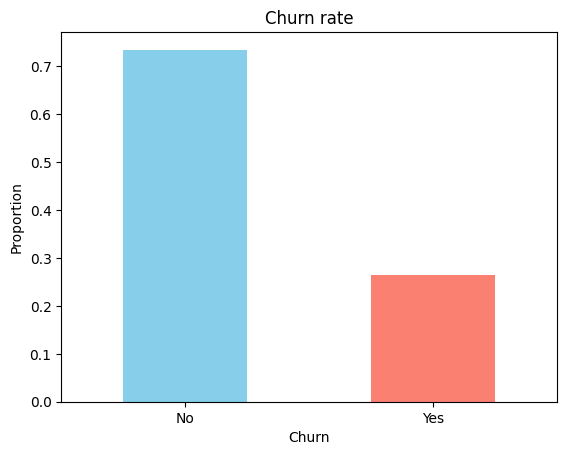

In [21]:
# Count churn values (0 vs 1) and plot
df['Churn'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn rate')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

In [22]:
# Cleaning and converting data types

# Check data type of 'TotalCharges'
print(df['TotalCharges'].dtype)

#Converting 'TotalCharges' to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for NaN values in 'TotalCharges' after conversion
print("Missing TotalChares", df['TotalCharges'].isnull().sum())

# Drop rows with NaN values in 'TotalCharges'
df.dropna(subset=['TotalCharges'], inplace=True)

object
Missing TotalChares 11


In [23]:
# Recheck the data type of 'TotalCharges'
print(df['TotalCharges'].dtype)

# Check unique values in each columns 
df.nunique()

# Manually list categorical features
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)

float64
Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [24]:
# Convert YES/NO categorical columns to binary
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


## 📝 Data Cleaning & Preparation Summary

- **Dataset Loaded:** `telco_churn.csv` successfully imported using Pandas
- **Initial Exploration:**
  - Used `.head()`, `.info()`, `.describe()` to understand structure and data types
  - Verified presence of missing values and data distribution
- **Data Cleaning Steps:**
  - Dropped `customerID` as it's a unique identifier with no predictive value
  - Converted `TotalCharges` to numeric using `errors='coerce'` to handle invalid entries
  - Removed rows with null values in `TotalCharges` (very few, minimal data loss)
- **Categorical Handling:**
  - Identified all object (string) columns as categorical
  - Mapped binary `"Yes"`/`"No"` columns to `1`/`0` for modeling (`Partner`, `Dependents`, etc.)
- **Outcome:** Dataset is now clean, numeric where needed, and ready for deeper EDA & modeling
